In [1]:
import tensorflow as tf
import tensorflow_hub as hub
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.applications.vgg16 import VGG16

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    #preprocessing_function=to_grayscale_then_rgb,
    validation_split=0.30)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\786me\Desktop\FinalYearProject\ASDScanPath\ASD\Contrasted\Dataset",
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    r"C:\Users\786me\Desktop\FinalYearProject\ASDScanPath\ASD\Contrasted\Dataset", # same directory as training data
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    subset='validation')

img_size = (224, 224 , 3)

Found 384 images belonging to 2 classes.
Found 163 images belonging to 2 classes.


In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [4]:
#Freeze weights 
for layer in base_model.layers[1:16]:
    layer.trainable = False

for i,layer in enumerate(base_model.layers):
    print(i,layer.name,layer.trainable)

0 input_1 True
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [5]:
model = tf.keras.Sequential([
    base_model,tf.keras.layers.Dropout(0.40)
])
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units= 16, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 1, activation = 'sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'binary_focal_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 7, 7, 512)         0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 16)                401424    
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 15,116,129
Trainable params: 5,121,057
Non

In [6]:
history = model.fit(train_generator, validation_data=validation_generator, epochs = 5)

Epoch 1/5
24/24 [==============================] - 48s 2s/step - loss: 0.2198 - accuracy: 0.5651 - val_loss: 0.1560 - val_accuracy: 0.6135
Epoch 2/5
24/24 [==============================] - 51s 2s/step - loss: 0.1592 - accuracy: 0.6016 - val_loss: 0.1386 - val_accuracy: 0.6012
Epoch 3/5
24/24 [==============================] - 47s 2s/step - loss: 0.1651 - accuracy: 0.5964 - val_loss: 0.1708 - val_accuracy: 0.6380
Epoch 4/5
24/24 [==============================] - 50s 2s/step - loss: 0.1724 - accuracy: 0.6016 - val_loss: 0.1727 - val_accuracy: 0.6012
Epoch 5/5
24/24 [==============================] - 50s 2s/step - loss: 0.1724 - accuracy: 0.5990 - val_loss: 0.1720 - val_accuracy: 0.6012


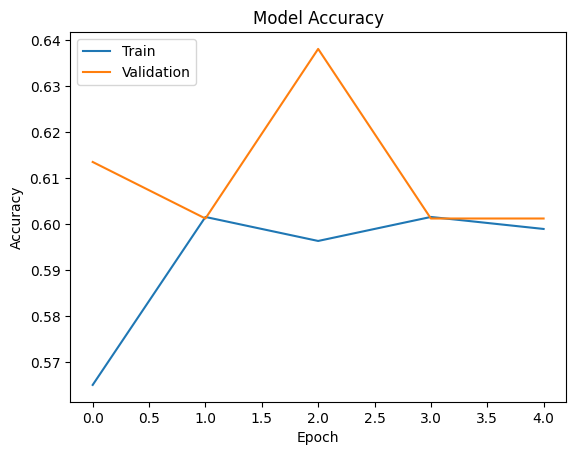

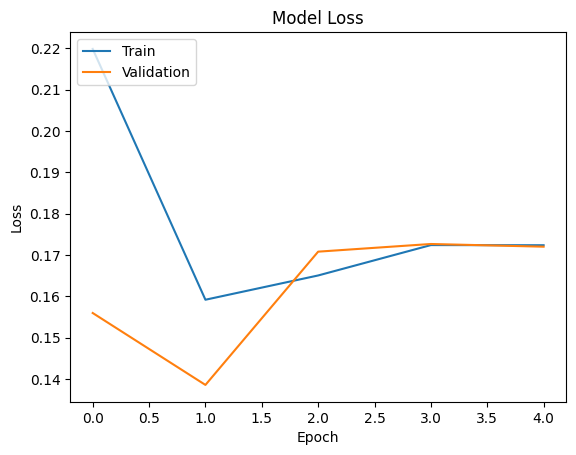

In [8]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:

model.save(r'C:\Users\786me\Desktop\FinalYearProject\EyeTrackWebSite\ml_website\VVG16.h5')